In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib as mpl

한국 주요 지수	<br>	
.	KS11	KOSPI 지수<br>
.	KQ11	KOSDAQ 지수<br>
.	KS50	KOSPI 50 지수<br>
.	KS100	KOSPI 100<br><br>
.	KRX100	KRX 100<br>
.	KS200	코스피 200<br><br>
미국 주요 지수		<br>
.	DJI	다우존스 지수<br>
.	IXIC	나스닥 지수<br>
.	US500	S&P 500 지수<br>
.	VIX	S&P 500 VIX<br><br>
국가별 대표 지수	<br>	
.	JP225	닛케이 225 선물<br>
.	STOXX50	유럽 STOXX 50<br>
.	HSI	항셍 (홍콩)<br>
.	CSI300	CSI 300 (중국)<br>
.	SSEC	상해 종합<br>
.	UK100	영국 FTSE<br>
.	DE30	독일 DAX 30<br>
.	FCHI	프랑스 CAC 40<br>

In [2]:
## 폰트 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family="NanumGothic")
mpl.font_manager._rebuild()

In [3]:
company_df = pd.read_excel("./src/KRX종목코드.xlsx", dtype=object, index_col=0)
# company_df["종목코드"]["삼성전자"]

In [4]:
## 기업별 주가정보 호출 함수
def stock_info(name, std):
    code = company_df["종목코드"][name]
    result = fdr.DataReader(code, std)
    return result

In [5]:
df1 = stock_info("삼성전자", "2000-01-01")
df1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516
...,...,...,...,...,...,...
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262


In [6]:
df1.Open

Date
2000-01-04     6000
2000-01-05     5800
2000-01-06     5750
2000-01-07     5560
2000-01-10     5600
              ...  
2021-01-04    81000
2021-01-05    81600
2021-01-06    83300
2021-01-07    82800
2021-01-08    83300
Name: Open, Length: 5189, dtype: int64

In [7]:
k1 = df1.index
k1

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', name='Date', length=5189, freq=None)

In [8]:
k2 = pd.to_datetime(k1)
k2[0]

Timestamp('2000-01-04 00:00:00')

In [9]:
targets = ["코스피","삼성전자", "현대차", "LG화학", "셀트리온"]

In [10]:
stock_list = [stock_info(target, "2000-01-01")['Close'] for target in targets]
len(stock_list)

5

In [11]:
df_multi_stock = pd.concat(stock_list, axis=1)
df_multi_stock.columns = targets
df_multi_stock

,코스피,삼성전자,현대차,LG화학,셀트리온
Date,,,,,
2000-01-04,1059.04,6110.0,20700.0,NaN,NaN
2000-01-05,986.31,5580.0,20800.0,NaN,NaN
2000-01-06,960.79,5620.0,19700.0,NaN,NaN
2000-01-07,948.65,5540.0,20300.0,NaN,NaN
2000-01-10,987.24,5770.0,20000.0,NaN,NaN
...,...,...,...,...,...
2021-01-04,2944.45,83000.0,207500.0,889000.0,347500.0
2021-01-05,2990.57,83900.0,209500.0,893000.0,354500.0
2021-01-06,2968.21,82200.0,203000.0,890000.0,353500.0


<AxesSubplot:xlabel='Date'>

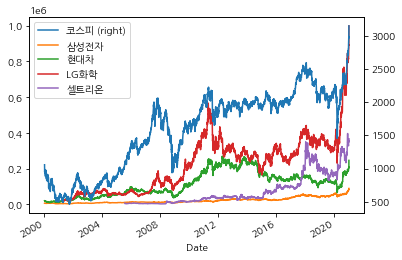

In [12]:
df_multi_stock.plot(secondary_y=['코스피'])

In [13]:
dji = fdr.DataReader('DJI', '2015-01-01') # Dow Jones Industrial(DJI)
sp = fdr.DataReader('US500', '2015-01-01') # S&P 500 지수 (NYSE)

In [14]:
dji

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,17832.99,17823.07,17951.78,17731.30,76270000.0,0.0006
2015-01-05,17501.65,17821.30,17821.30,17475.93,116160000.0,-0.0186
2015-01-06,17371.64,17504.18,17581.05,17262.37,101870000.0,-0.0074
2015-01-07,17584.52,17374.78,17597.08,17374.78,91030000.0,0.0123
2015-01-08,17907.87,17591.97,17916.04,17591.97,114890000.0,0.0184
...,...,...,...,...,...,...
2021-01-04,30223.89,30627.47,30674.28,29881.82,476730000.0,-0.0125
2021-01-05,30391.60,30204.25,30504.89,30141.78,350910000.0,0.0055
2021-01-06,30829.40,30362.78,31022.65,30313.07,500430000.0,0.0144


In [15]:
### 연도내 개별 종목 수익률 구하기(연초값 대비 비교 컨셉)
# df_norm = df / df.iloc[0] - 1
# df_norm.plot()

In [16]:
import plotly.graph_objects as go
import pandas as pd
import FinanceDataReader as fdr
from urllib.request import urlopen
import dash
import dash_table
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input, State
import dash_extensions as de

In [17]:
df1 = stock_info("삼성전자", "2000-01-01")
df1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516
...,...,...,...,...,...,...
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262


In [18]:
x = df1.index.values
x

array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
       '2000-01-06T00:00:00.000000000', ...,
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
x1 = pd.Series(x)
x1

0      2000-01-04
1      2000-01-05
2      2000-01-06
3      2000-01-07
4      2000-01-10
          ...    
5184   2021-01-04
5185   2021-01-05
5186   2021-01-06
5187   2021-01-07
5188   2021-01-08
Length: 5189, dtype: datetime64[ns]

In [20]:
y = df1.Close.values
y

array([ 6110,  5580,  5620, ..., 82200, 82900, 88800], dtype=int64)

In [21]:
y1 = pd.Series(y)
y1

0        6110
1        5580
2        5620
3        5540
4        5770
        ...  
5184    83000
5185    83900
5186    82200
5187    82900
5188    88800
Length: 5189, dtype: int64

In [22]:
app = dash.Dash()

In [31]:
app.layout = html.Div([
    
    dcc.Graph(
        figure = {
            'data':[
                go.Scatter(
                    x = x1,
                    y = y,
                    #mode='markers'
                )
            ],
            'layout':go.Layout(
                title="test1",
                xaxis={'title':'x values'},
                yaxis={'title':'y values'}
            )
        }

    )
])

In [32]:
if __name__ == '__main__':
    app.run_server(port = 4022)

Dash is running on http://127.0.0.1:4022/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:4022/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jan/2021 18:51:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2021 18:51:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2021 18:51:55] "GET /_dash-layout HTTP/1.1" 200 -
